### Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
- колонки из самих файлов (product_id, quantity), 
- а также имя пользователя (name), 
- и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [64]:
import pandas as pd
import os

In [65]:
# Используем первый способ, у него есть нюансы со слэшами

In [66]:
path = 'C:/Users/arkhi/Jupyter notebook/data/data'

In [67]:
folder_data = os.listdir('C:/Users/arkhi/Jupyter notebook/data/data')

In [68]:
folder_data

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [69]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Construct full path to file
        data_path = f'{current_path}/{file}'
        
        # Read data      
        temp_df = pd.read_csv(data_path)
        
        # Extract date and name
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data info main df
        df = pd.concat((df, temp_df))

In [70]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [71]:
df.reset_index(drop = True, inplace=True)

In [72]:
df # Как видно извчечь дату и имя в требуемом виде не удалось

,product_id,quantity,date,name
0,47,1,data,data\2020-12-03\Alexey_Smirnov
1,57,1,data,data\2020-12-03\Alexey_Smirnov
2,14,2,data,data\2020-12-03\Alexey_Smirnov
3,52,1,data,data\2020-12-03\Alexey_Smirnov
4,1,4,data,data\2020-12-03\Alexey_Smirnov
...,...,...,...,...
156,66,4,data,data\2020-12-09\Rostislav_Petrov
157,39,2,data,data\2020-12-09\Rostislav_Petrov
158,82,4,data,data\2020-12-09\Vasiliy_Ivanov
159,74,2,data,data\2020-12-09\Vasiliy_Ivanov


In [ ]:
# Втоорой способ

In [56]:
from pathlib import Path

In [57]:
path = 'C:/Users/arkhi/Jupyter notebook/data/data'

In [58]:
path = Path('C:/Users/arkhi/Jupyter notebook/data/data')

In [59]:
path

WindowsPath('C:/Users/arkhi/Jupyter notebook/data/data')

In [73]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)
        data_path = part_path / file
        
        # Read data      
        temp_df = pd.read_csv(data_path)
        
        # Extract date and name
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data info main df
        df = pd.concat((df, temp_df))

In [74]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [75]:
df.reset_index(drop = True, inplace=True)

In [76]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


### Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [84]:
df \
    .groupby('name') \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity')

,quantity
name,
Vasiliy_Petrov,7
Alexey_Petrov,7
Rostislav_Ivanov,9
Kirill_Petrov,9
Petr_Petrov,14
Vasiliy_Fedorov,15
Rostislav_Fedorov,16
Alexey_Ivanov,17
Rostislav_Smirnov,17


### Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
Сколько было продано единиц товара с product_id==56?

In [97]:
top_products = (
    df
    .groupby('product_id', as_index = False)
    .agg({'quantity':'sum'})
    .sort_values('quantity', ascending = False)
    .head(10)
)

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

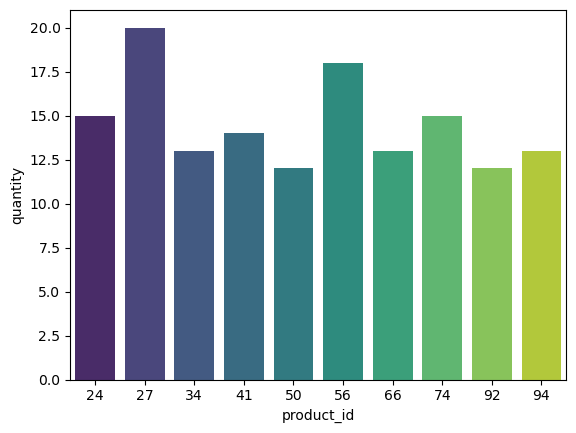

In [110]:
#plt.figure(figsize=(21,8))
sns.barplot(x = top_products.product_id, y = top_products.quantity, palette = 'viridis')

### Визуализируйте продажи по дням.

<AxesSubplot:xlabel='date'>

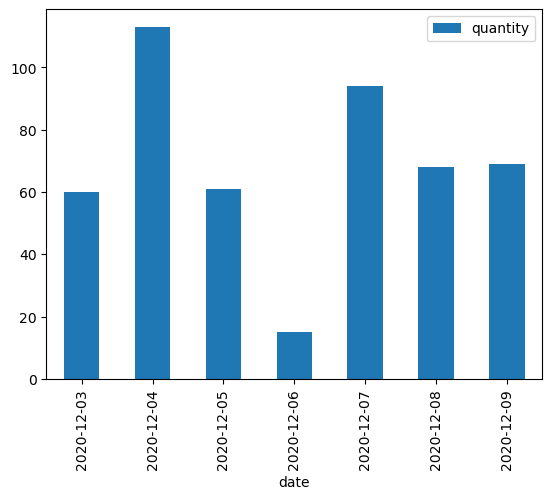

In [120]:
df \
    .groupby('date') \
    .agg({'quantity':'sum'}) \
    .plot(kind = 'bar')

### Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [127]:
df \
    .groupby(['name', 'product_id']) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


# That's all!!!